In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-dataset-of-india/House Price India.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data= pd.read_csv('/kaggle/input/house-price-dataset-of-india/House Price India.csv')
data.head(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [4]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [5]:
data.shape

(14620, 23)

In [6]:
data= data.drop(['Date',  
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'grade of the house',
       'Area of the basement','Built Year', 'Renovation Year', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov','Distance from the airport'], axis=1)
data.head()

,id,number of bedrooms,number of bathrooms,condition of the house,Area of the house(excluding basement),Postal Code,Number of schools nearby,Price
0,6762810145,5,2.50,5,3370,122003,2,2380000
1,6762810635,4,2.50,5,1910,122004,2,1400000
2,6762810998,5,2.75,3,2910,122004,1,1200000
3,6762812605,4,2.50,3,3310,122005,3,838000
4,6762812919,3,2.00,4,1880,122006,1,805000


In [7]:
data.describe()

,id,number of bedrooms,number of bathrooms,condition of the house,Area of the house(excluding basement),Postal Code,Number of schools nearby,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,3.379343,2.129583,3.430506,1801.783926,122033.062244,2.012244,5.389322e+05
std,6.237575e+03,0.938719,0.769934,0.664151,833.809963,19.082418,0.817284,3.675324e+05
min,6.762810e+09,1.000000,0.500000,1.000000,370.000000,122003.000000,1.000000,7.800000e+04
25%,6.762815e+09,3.000000,1.750000,3.000000,1200.000000,122017.000000,1.000000,3.200000e+05
50%,6.762821e+09,3.000000,2.250000,3.000000,1580.000000,122032.000000,2.000000,4.500000e+05
75%,6.762826e+09,4.000000,2.500000,4.000000,2240.000000,122048.000000,3.000000,6.450000e+05
max,6.762832e+09,33.000000,8.000000,5.000000,9410.000000,122072.000000,3.000000,7.700000e+06


(array([1.2916e+04, 1.4260e+03, 1.9100e+02, 6.0000e+01, 1.9000e+01,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  78000.,  840200., 1602400., 2364600., 3126800., 3889000.,
        4651200., 5413400., 6175600., 6937800., 7700000.]),
 <BarContainer object of 10 artists>)

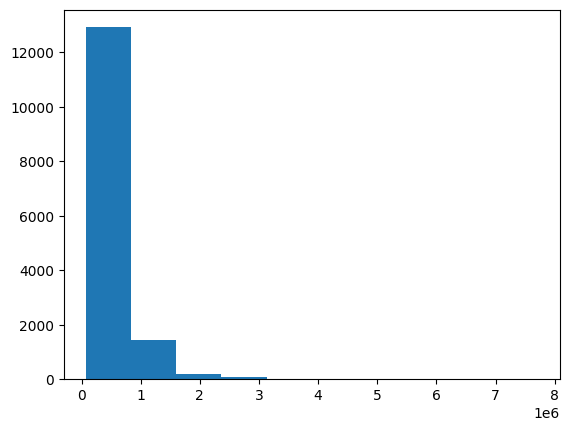

In [8]:
plt.hist(data['Price'])

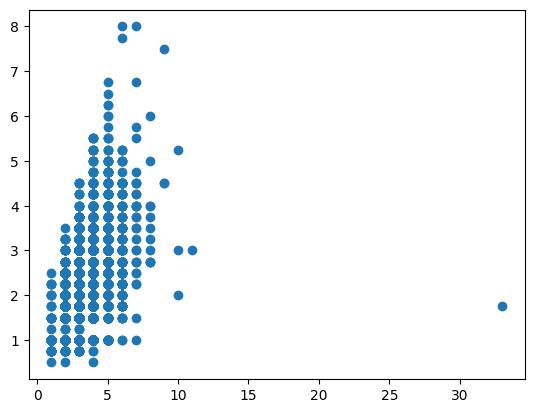

In [9]:
plt.scatter(data['number of bedrooms'], data['number of bathrooms'])

(array([  18.,    0.,  100.,    0.,    0., 9350.,    0., 3874.,    0.,
        1278.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

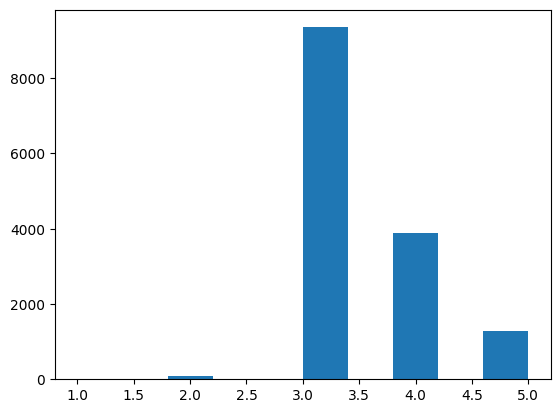

In [10]:
plt.hist(data['condition of the house'])

In [11]:
Price= data['Price'].value_counts()
Price

450000    114
350000    113
400000    104
375000    103
550000    102
         ... 
561600      1
856500      1
907687      1
307999      1
146000      1
Name: Price, Length: 2901, dtype: int64

<AxesSubplot: xlabel='Price', ylabel='count'>

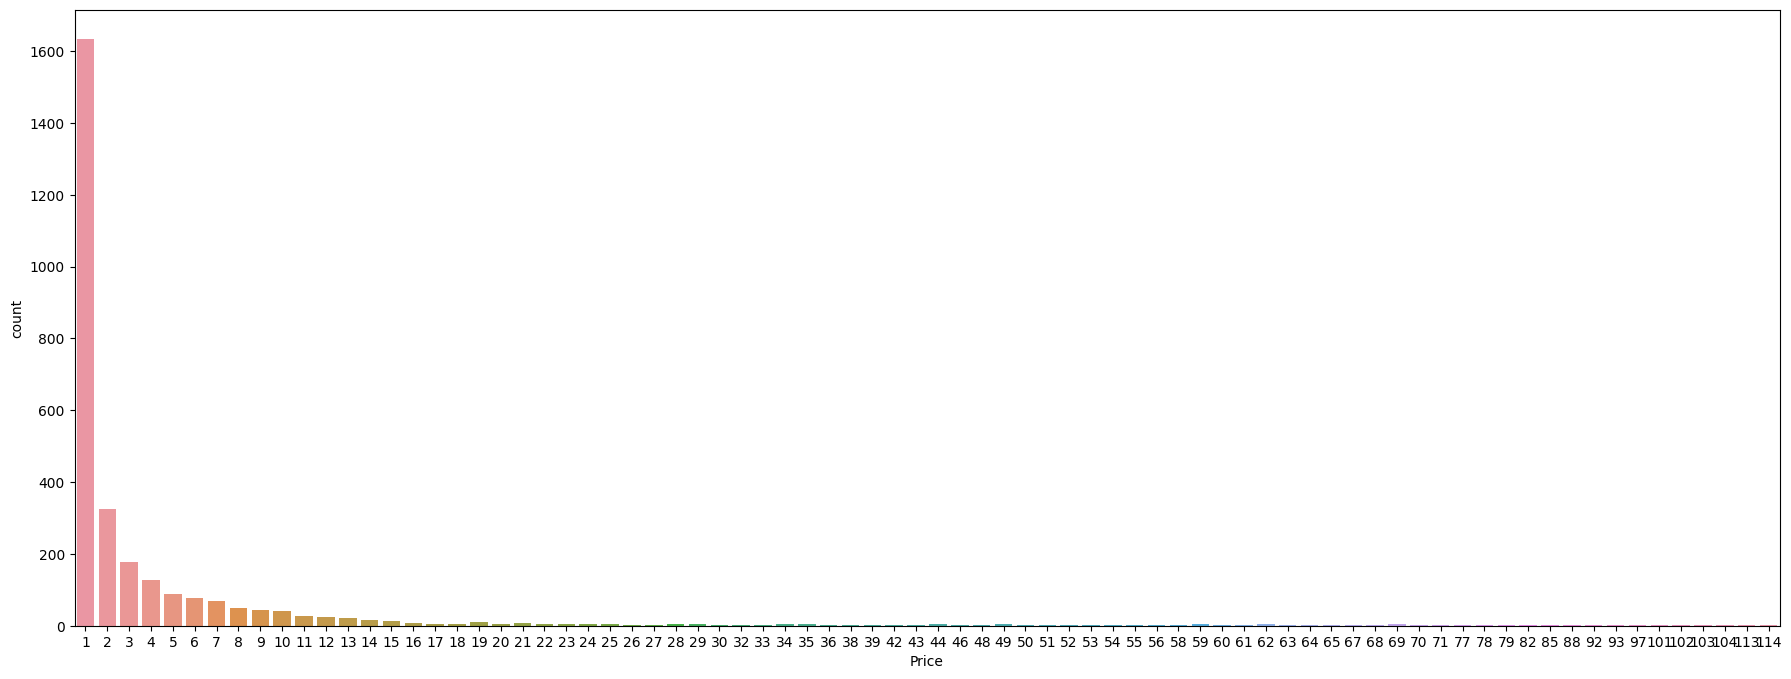

In [12]:
plt.figure(figsize=(22,8))
sns.countplot(x=Price)

In [13]:
number_of_bedrooms =data['number of bedrooms'].value_counts()
number_of_bedrooms

3     6612
4     4724
2     1844
5     1079
6      176
1      136
7       30
8       11
9        3
10       3
33       1
11       1
Name: number of bedrooms, dtype: int64

<AxesSubplot: xlabel='number of bedrooms', ylabel='count'>

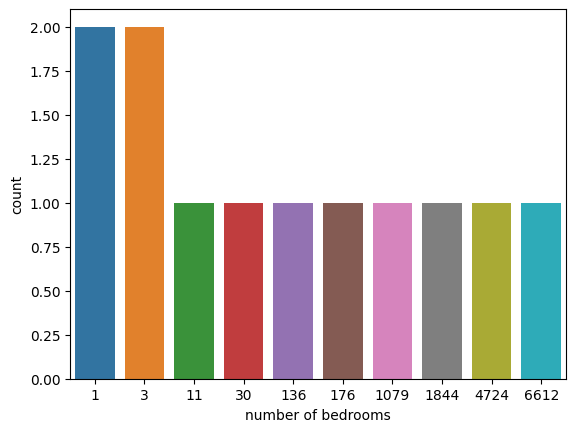

In [14]:
sns.countplot(x=number_of_bedrooms)